In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
df = pd.read_csv(r"C:\Users\PRITAM\Downloads\Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
809,810,15778463,Ikenna,657,France,Female,37,6,95845.60,1,1,0,122218.23,0
7431,7432,15705379,Upjohn,678,France,Male,38,3,0.00,2,1,0,66561.60,0
3671,3672,15616666,Artemova,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0
6139,6140,15806407,Wilson,652,France,Female,37,4,0.00,2,1,0,143393.24,0
771,772,15640442,Standish,717,France,Male,31,4,129722.57,1,0,0,41176.60,0


In [21]:
df.drop(['CustomerId','RowNumber', 'Surname','Geography'],axis='columns',inplace=True)

In [22]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df.shape

(10000, 10)

In [24]:
df[df.Exited==0]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,Male,50,7,0.00,2,1,1,10062.80,0
8,501,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9993,644,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0


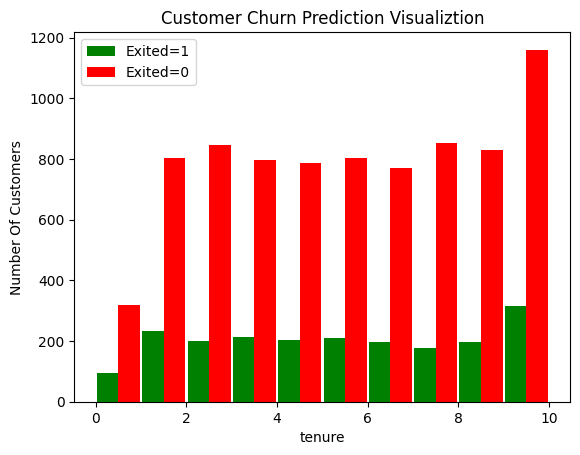

In [25]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=1','Exited=0'])
plt.legend()

In [27]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\PRITAM\AppData\Local\Temp\ipykernel_12996\2750846270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\PRITAM\AppData\Local\Temp\ipykernel_12996\2750846270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

In [29]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [30]:
cols_to_scale = ['Tenure','EstimatedSalary','Balance']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [33]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [34]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
X_train = np.asarray(X).astype(np.int_)
y_train = np.array(y).astype(np.int_)

In [36]:
X_train.shape

(10000, 9)

In [37]:
X_test.shape

(2000, 9)

In [38]:
X_train[:10]

array([[619,   1,  42,   0,   0,   1,   1,   1,   0],
       [608,   1,  41,   0,   0,   1,   0,   1,   0],
       [502,   1,  42,   0,   0,   3,   1,   0,   0],
       [699,   1,  39,   0,   0,   2,   0,   0,   0],
       [850,   1,  43,   0,   0,   1,   1,   1,   0],
       [645,   0,  44,   0,   0,   2,   1,   0,   0],
       [822,   0,  50,   0,   0,   2,   1,   1,   0],
       [376,   1,  29,   0,   0,   4,   1,   0,   0],
       [501,   0,  44,   0,   0,   2,   0,   1,   0],
       [684,   0,  27,   0,   0,   1,   1,   1,   0]])

In [39]:
import tensorflow as tf
from tensorflow import keras

In [47]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7269 - loss: 1.5708 - val_accuracy: 0.8045 - val_loss: 0.4859
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.5460 - val_accuracy: 0.8030 - val_loss: 0.5001
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.5133 - val_accuracy: 0.7965 - val_loss: 0.4716
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7808 - loss: 0.5171 - val_accuracy: 0.7925 - val_loss: 0.4945
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.5100 - val_accuracy: 0.7685 - val_loss: 0.5384
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7892 - loss: 0.5162 - val_accuracy: 0.8010 - val_loss: 0.4847
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7601 - loss: 0.5680 - val_accuracy: 0.8040 - val_loss: 0.5092
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7880 - loss: 0.4967 - val_accu

In [50]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4307 


[0.43431994318962097, 0.8130000233650208]

In [51]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.09867792],
       [0.14964432],
       [0.10544872],
       [0.06407572],
       [0.18766294]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1595
           1       0.62      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



Text(95.72222222222221, 0.5, 'Truth')

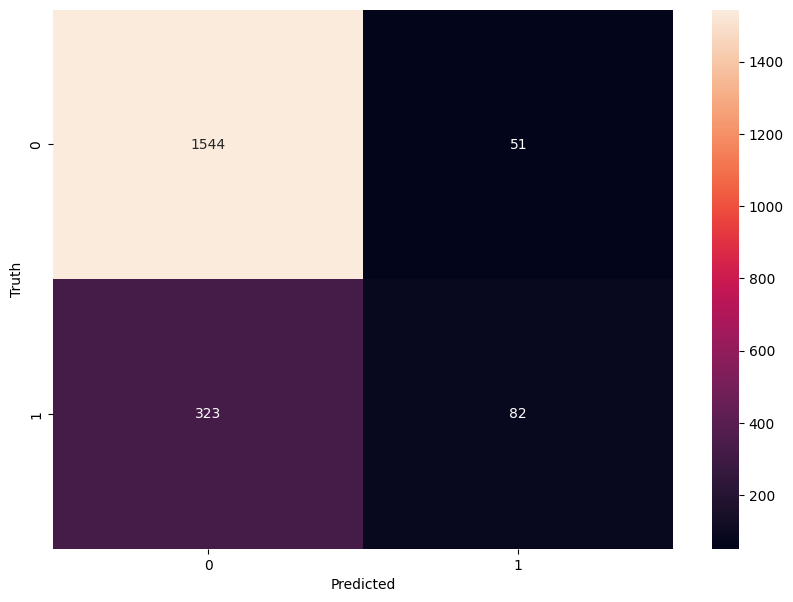

In [56]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
y_test.shape

(2000,)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.30%
